## Assignment 7

#### reading a CSV file using pandas

In [1]:
import pandas as pd
file = "C:\\Users\\pinis\\Downloads\\singapore_airlines_reviews.csv"
df = pd.read_csv(file)
df.head(20)

published_date published_platform  rating    type  \
0   2024-03-12T14:41:14-04:00            Desktop       3  review   
1   2024-03-11T19:39:13-04:00            Desktop       5  review   
2   2024-03-11T12:20:23-04:00            Desktop       1  review   
3   2024-03-11T07:12:27-04:00            Desktop       5  review   
4   2024-03-10T05:34:18-04:00            Desktop       2  review   
5   2024-03-10T01:16:48-05:00            Desktop       1  review   
6   2024-03-10T00:54:43-05:00            Desktop       5  review   
7   2024-03-09T17:45:56-05:00            Desktop       1  review   
8   2024-03-08T23:10:41-05:00            Desktop       1  review   
9   2024-03-08T19:18:57-05:00            Desktop       1  review   
10  2024-03-07T19:47:40-05:00            Desktop       1  review   
11  2024-03-07T00:14:44-05:00            Desktop       1  review   
12  2024-03-06T22:36:44-05:00            Desktop       2  review   
13  2024-03-06T14:56:10-05:00            Desktop       1  review   
14  2024-03-05T13:40:09-05:00            Desktop       1  review   
15  2024-03-05T01:33:33-05:00            Desktop       1  review   
16  2024-03-03T21:20:17-05:00            Desktop       1  review   
17  2024-03-02T23:07:29-05:00            Desktop       5  review   
18  2024-03-02T02:24:43-05:00            Desktop       3  review   
19  2024-03-02T00:06:25-05:00            Desktop       2  review   

                                                 text  \
0   We used this airline to go from Singapore to L...   
1   The service on Singapore Airlines Suites Class...   
2   Booked, paid and received email confirmation f...   
3   Best airline in the world, seats, food, servic...   
4   Premium Economy Seating on Singapore Airlines ...   
5   We booked our flights a full 9 months in advan...   
6   This was a fascinating experience. As I sat in...   
7   Very bad expeirence for flight check in at bai...   
8   Respected Faculty, I am Bincy, writing this  t...   
9   I would rate Singapore airlines the worse I ha...   
10  Singapore Airlines (SQ), may be one of the lar...   
11  Yesterday ( 6 March ) my flight was canceled b...   
12  What has happened to Singapore Airlines? I use...   
13  I am disabled and had a VERY BAD experience wi...   
14  Well I have flown to Australia quite a few tim...   
15  Their Premium Economy cabin is a RIP-OFF. We a...   
16  SQ did lose both of our luggages and they only...   
17  flight was on time. star alliance members have...   
18  I'd heard many good things about Singapore Air...   
19  Paid for a Premium Economy ticket,  an extra $...   

                                                title  helpful_votes  
0                                                  Ok              0  
1   The service in Suites Class makes one feel lik...              0  
2                          Don’t give them your money              0  
3                           Best Airline in the World              0  
4   Premium Economy Seating on Singapore Airlines ...              0  
5                 Impossible to get a promised refund              0  
6                                   WOAH. FLY WITH SQ              0  
7                                  Long Q to check in              0  
8                              Very bad, disappointed              0  
9                     Give Singapore airlines a miss.              1  
10                                Very disappointed !              1  
11                    THE WORST EXPERIENCE IN MY LIFE              3  
12             What's happened to Singapore Airlines?              2  
13                                BEWARE BEWAR BEWARE              1  
14                                       Never again.              2  
15  PREMIUM ECONOMY RIP OFF - NOT WORTH THE $$$ di...              0  
16              Missing Baggage - No Customer Service              0  
17     Comfortable and punctual flight with hot meal.              0  
18                                   No

####  printing the first 400 characters of the "text" column for two specific rows in the DataFrame

In [2]:
print(repr(df.iloc[2667]["text"][0:400]))
print(repr(df.iloc[4000]["text"][0:400]))

'Economy s very similar to other airlines in spite of reputation of the airline as a step up. I was clean, the personnel was attentive and the price was right.'
'The flight time is 18.5 hours so be prepared for one long non stop service flight.  Service is always very good on SQ but use the time wisely to get yourself adjusted to the local time zone through sleeping time, meals and time to catch in some movies.  Upon arrival at Newark at 6am, be prepared to face long queues at US immigration.   As of beginning in 2019, arrivals should apply for mobile pass'


#### using regular expressions to split the "text" column into paragraphs and then calculating the number of paragraphs for each entry in DataFrame

In [3]:
import re
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

#### install the spacy library

In [4]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


#### importing the TfidfVectorizer from scikit-learn and the stop words from spaCy's English language module

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

#### prints the shape of the TF-IDF matrix, which represents the number of documents (rows) and the number of features (columns) after vectorization

In [6]:
stop_words_list = list(stopwords)
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
print(tfidf_text_vectors.shape)


C:\Users\pinis\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(10000, 5606)


#### creating a new DataFrame named paragraph_df which will store each paragraph along with its corresponding rating from the original DataFrame df

In [7]:
paragraph_df = pd.DataFrame([{ "text": paragraph, "rating": rating } 
                               for paragraphs, rating in zip(df["paragraphs"], df["rating"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

text  rating
0  We used this airline to go from Singapore to L...       3
1  We got to the airport and had to check in at t...       3
2  Overall the flight was ok, seats were comfy, l...       3
3  The service on Singapore Airlines Suites Class...       5
4  The Suites Class cabin resembles the private c...       5
5  Not all suites have the same size. The biggest...       5
6  The seat was the first thing that caught my ey...       5
7  There is no lack of storage space in the Suite...       5
8  Booked, paid and received email confirmation f...       1
9  Best airline in the world, seats, food, servic...       5

In [8]:
stop_words_list = list(stopwords)# Convert spaCy stop words to a list
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)# Initialize the TfidfVectorizer with spaCy stop words, min_df, and max_df
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])# Fit and transform the text data in paragraph_df
print(tfidf_para_vectors.shape)


C:\Users\pinis\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(19616, 5695)


#### uses Non-Negative Matrix Factorization (NMF) to decompose the TF-IDF matrix of text data into two matrices

In [9]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


#### displaying topics generated by topic modeling algorithm

In [10]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))
 
# Display topics
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  singapore (7.03)
  airlines (6.39)
  fly (1.51)
  flying (1.43)
  flights (1.35)

Topic 01
  good (15.71)
  food (4.86)
  entertainment (4.06)
  service (1.92)
  flight (1.56)

Topic 02
  economy (7.05)
  premium (4.51)
  seats (2.32)
  leg (1.96)
  room (1.91)

Topic 03
  flight (2.53)
  time (0.72)
  hours (0.68)
  meal (0.61)
  hour (0.50)

Topic 04
  class (4.98)
  business (4.44)
  seat (1.72)
  lounge (1.23)
  bed (1.13)

Topic 05
  great (18.11)
  service (3.55)
  food (2.72)
  entertainment (2.57)
  flight (2.13)

Topic 06
  crew (9.32)
  cabin (7.46)
  attentive (1.89)
  friendly (1.29)
  sq (0.92)

Topic 07
  airline (9.04)
  best (6.35)
  service (2.08)
  world (1.76)
  food (1.46)

Topic 08
  staff (8.22)
  friendly (5.19)
  helpful (4.17)
  comfortable (3.20)
  seats (1.81)

Topic 09
  excellent (20.72)
  service (7.89)
  flight (3.36)
  food (2.62)
  comfortable (2.00)


####  using Non-Negative Matrix Factorization (NMF) to decompose the TF-IDF vectors of paragraphs into two matrices: W_para_matrix and H_para_matrix

In [11]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Assuming you've defined and imported the display_topics function
# Replace "nmf_para_model" and "tfidf_para_vectorizer" with your actual model and vectorizer objects
feature_names = tfidf_para_vectorizer.get_feature_names_out()
display_topics(nmf_para_model, feature_names)


Topic 00
  good (21.93)
  food (8.23)
  entertainment (3.99)
  overall (1.73)
  choice (1.64)

Topic 01
  singapore (8.78)
  airlines (8.39)
  fly (2.37)
  flying (1.46)
  definitely (0.93)

Topic 02
  class (9.15)
  business (7.56)
  sq (1.85)
  lounge (1.47)
  experience (0.80)

Topic 03
  flight (5.39)
  time (1.53)
  hours (0.86)
  long (0.74)
  hour (0.66)

Topic 04
  service (16.37)
  excellent (12.68)
  food (3.44)
  customer (2.80)
  quality (1.14)

Topic 05
  seats (4.21)
  seat (3.66)
  comfortable (2.97)
  leg (2.21)
  room (2.00)

Topic 06
  airline (12.28)
  best (4.33)
  recommend (2.57)
  travel (1.47)
  world (1.46)

Topic 07
  great (22.93)
  food (3.97)
  experience (3.27)
  entertainment (3.01)
  fly (2.31)

Topic 08
  economy (12.29)
  premium (7.90)
  extra (1.53)
  worth (1.38)
  better (1.10)

Topic 09
  crew (5.94)
  staff (4.85)
  cabin (4.59)
  friendly (4.35)
  helpful (3.00)


#### calculate the percentage contribution of each topic 

In [12]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([10.73305375, 11.51564146,  9.56938436, 17.26886051,  8.65338348,
        8.1112637 ,  7.84155698,  9.77619216,  9.34578354,  7.18488006])

#### calculates the sum of each column (topic) in the document-topic matrix

In [13]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([ 7.29047525, 16.33239836,  7.99158525, 17.06590198,  9.15705431,
        9.5042665 ,  8.8793911 ,  7.32833741,  7.12852819,  9.32206164])

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words set to a list of strings
stop_words_list = list(stopwords)

# Assuming paragraph_df["text"] contains your paragraph data

# Initialize CountVectorizer with the stop words list, minimum, and maximum document frequency
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)

# Transform paragraph data into document-term matrix
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])

# Print the shape of the document-term matrix
print("Shape of CountVectorizer output:", count_para_vectors.shape)

# Initialize LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit LDA model to the document-term matrix
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


C:\Users\pinis\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


Shape of CountVectorizer output: (19616, 5695)


#### initializes a CountVectorizer to convert text data into a matrix of token counts, similar to TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words_list = list(stopwords)
count_para_vectorizer = CountVectorizer(stop_words=stop_words_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
print("Shape of CountVectorizer output:", count_para_vectors.shape)


Shape of CountVectorizer output: (19616, 5695)


#### using Latent Dirichlet Allocation (LDA) for topic modeling with the paragraphs

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

#### display the top words for each topic obtained from the Latent Dirichlet Allocation (LDA) model

In [17]:
feature_names = count_para_vectorizer.get_feature_names_out()
display_topics(lda_para_model, feature_names)


Topic 00
  flight (8.55)
  singapore (6.54)
  time (2.48)
  hours (1.70)
  airlines (1.56)

Topic 01
  crew (3.35)
  flight (2.66)
  cabin (2.07)
  sq (1.59)
  passengers (1.46)

Topic 02
  flight (2.33)
  singapore (1.85)
  airlines (1.17)
  customer (1.14)
  airline (1.04)

Topic 03
  check (3.17)
  boarding (2.26)
  staff (1.69)
  luggage (1.17)
  airport (1.10)

Topic 04
  seat (7.71)
  seats (4.72)
  bed (1.62)
  comfortable (1.47)
  leg (1.41)

Topic 05
  flight (4.22)
  good (4.20)
  service (4.07)
  food (3.82)
  great (2.65)

Topic 06
  singapore (7.64)
  airlines (6.43)
  airline (2.83)
  service (1.98)
  fly (1.87)

Topic 07
  economy (8.95)
  premium (5.09)
  class (3.64)
  seats (2.61)
  business (2.28)

Topic 08
  class (4.24)
  sq (3.42)
  business (3.02)
  sin (2.56)
  aircraft (1.99)

Topic 09
  food (3.47)
  meal (3.07)
  flight (2.53)
  served (2.03)
  meals (1.82)


#### calculates the percentage contribution of each topic across all paragraphs

In [18]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([11.01999841,  5.9677771 , 10.6073033 ,  6.42287178,  7.07774782,
       21.6158833 , 16.57906891,  6.46918658,  4.73535018,  9.50481261])

In [19]:
pip install pyLDAvis

  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558aeb21571d642f781d842d8dd0fd9c6b0645a/scipy-1.10.1-cp311-cp311-win_amd64.whl.met

#### visualize topics generated by an LDA (Latent Dirichlet Allocation) model using the pyLDAvis library

In [20]:
import pyLDAvis.lda_model

lda_display = pyLDAvis.lda_model.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

#### code defines a function wordcloud_topics to generate word clouds for each topic obtained from a topic modeling model.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\pinis\AppData\Local\Temp\ipykernel_11568\3253276570.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### generate and display a word cloud for each topic based on the top terms obtained from the NMF mode

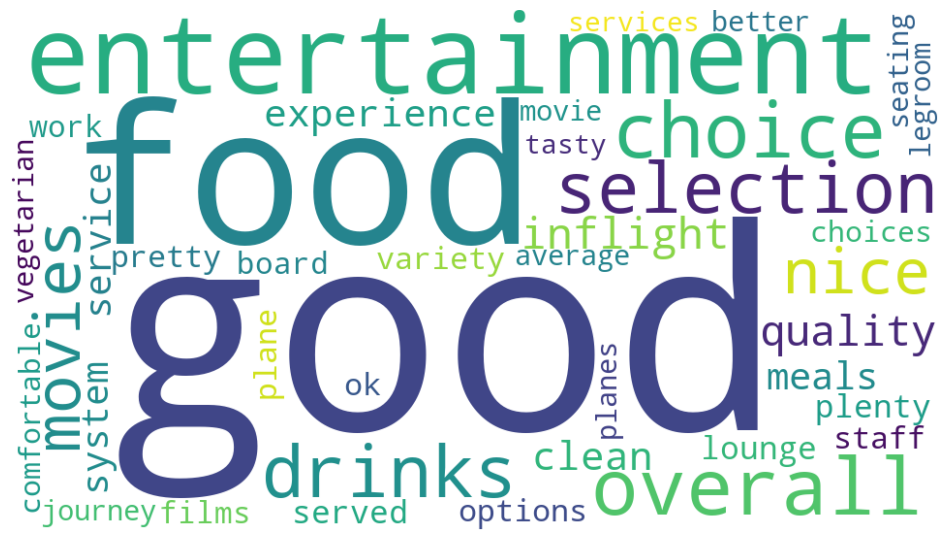

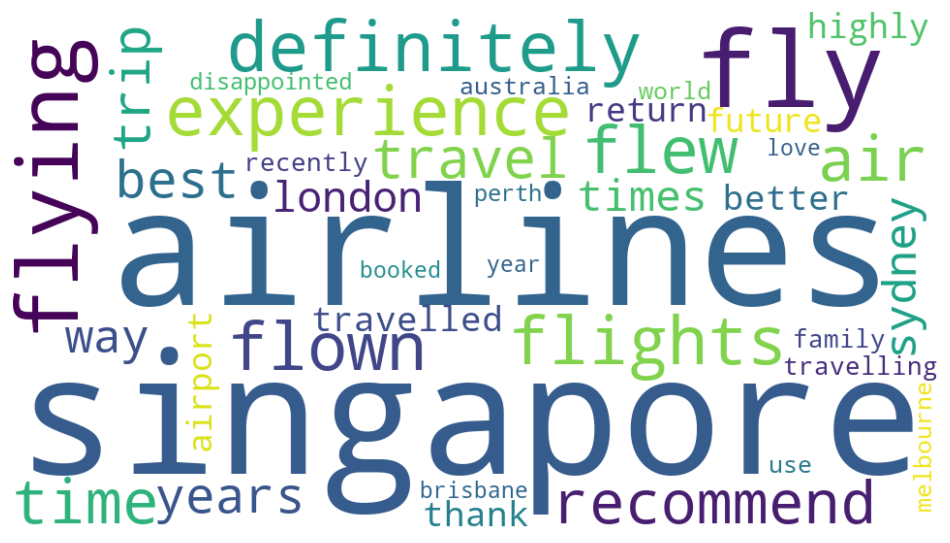

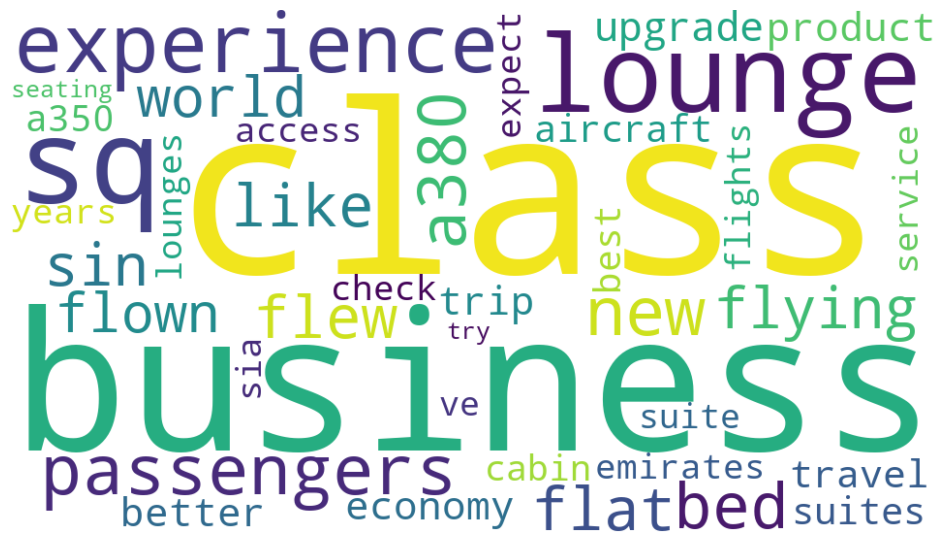

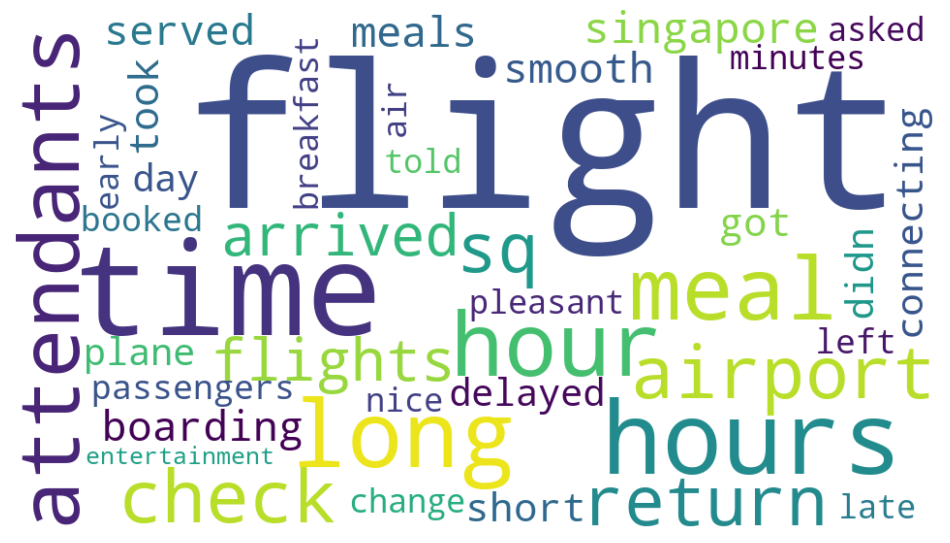

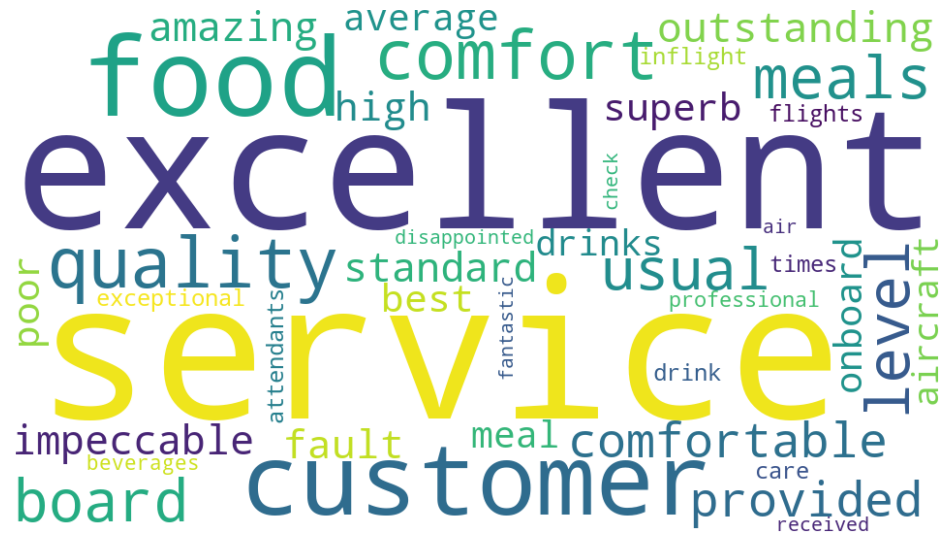

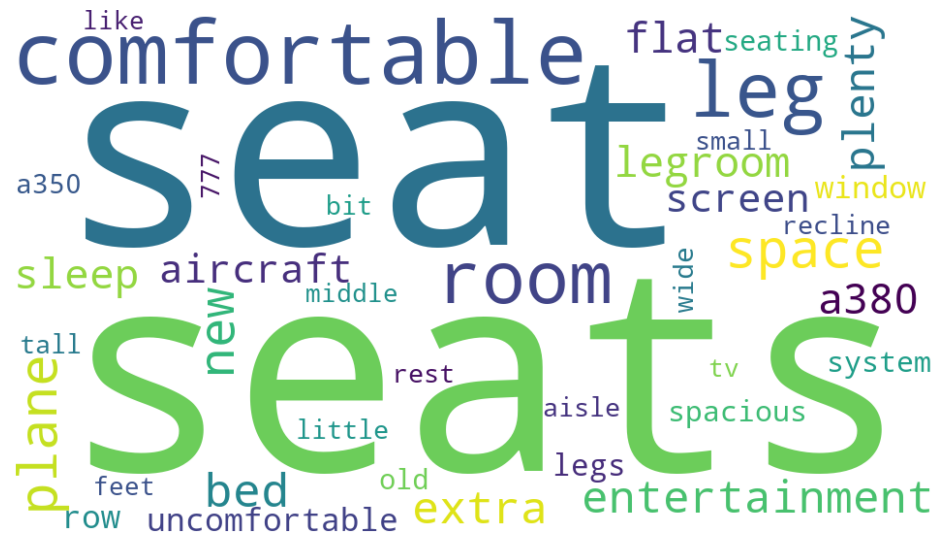

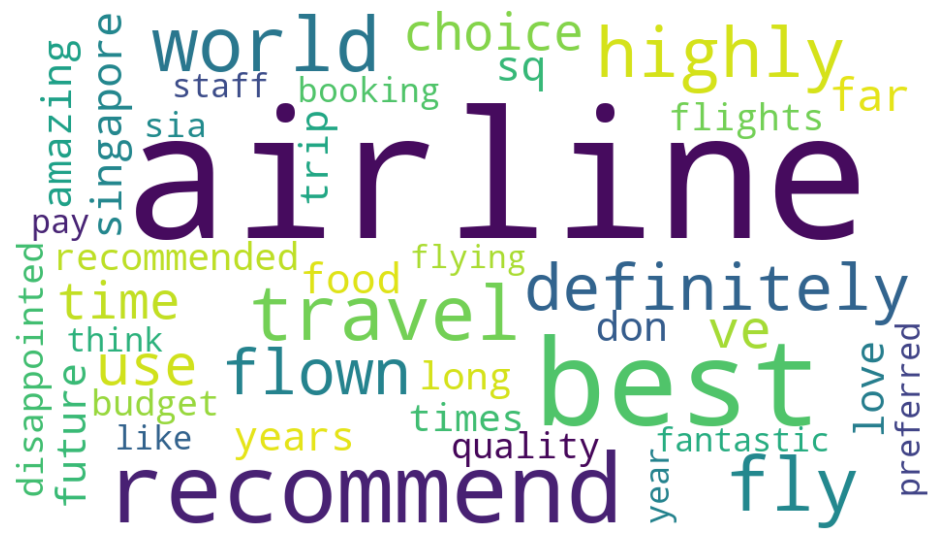

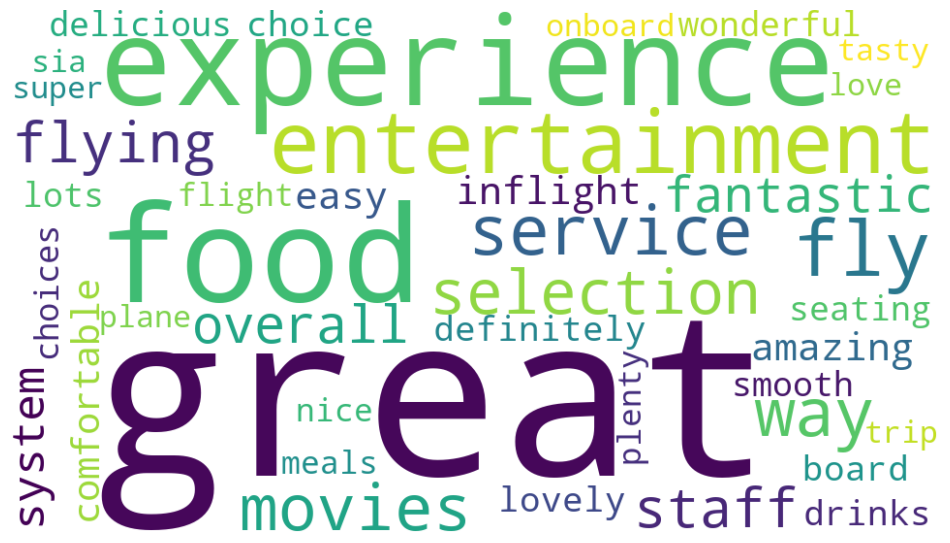

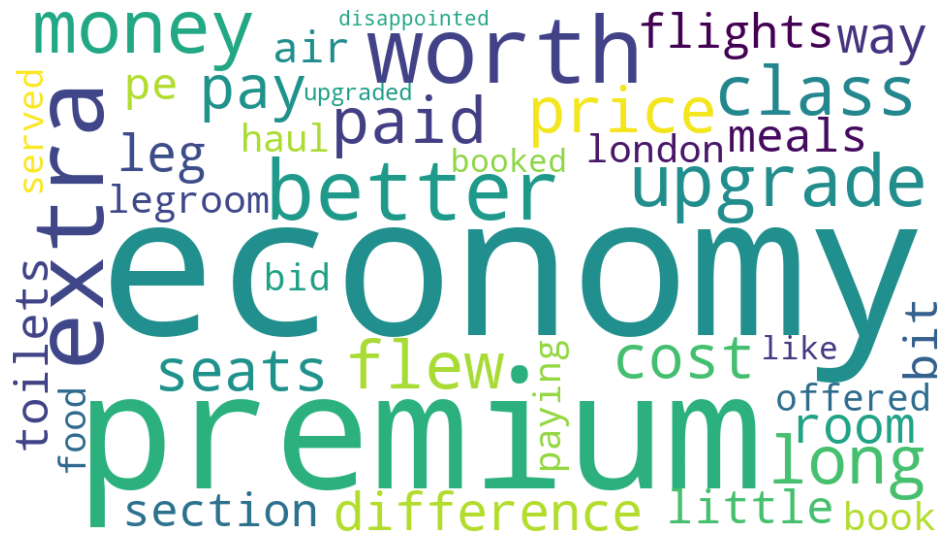

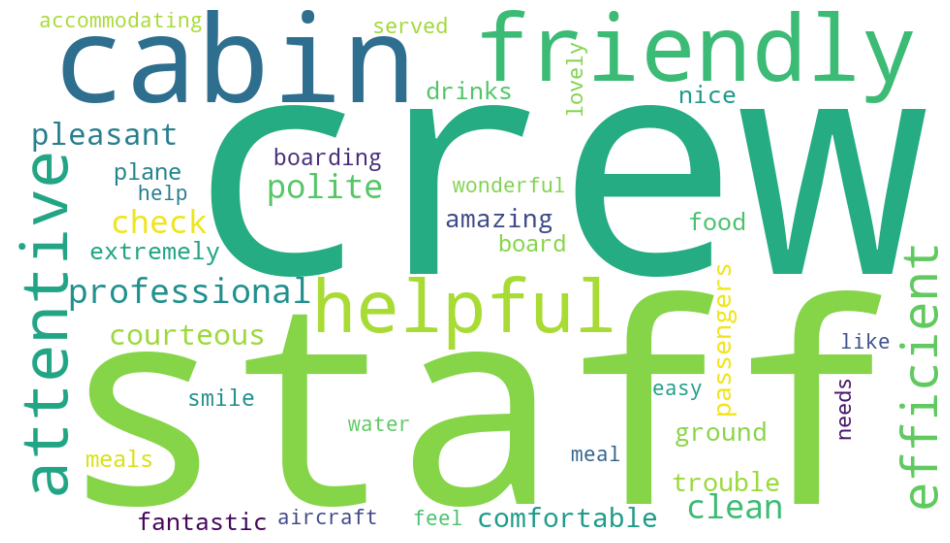

In [22]:
feature_names = tfidf_para_vectorizer.get_feature_names_out()
wordcloud_topics(nmf_para_model, feature_names)

#### generate and display a word cloud for each topic based on the top terms obtained from the lda model

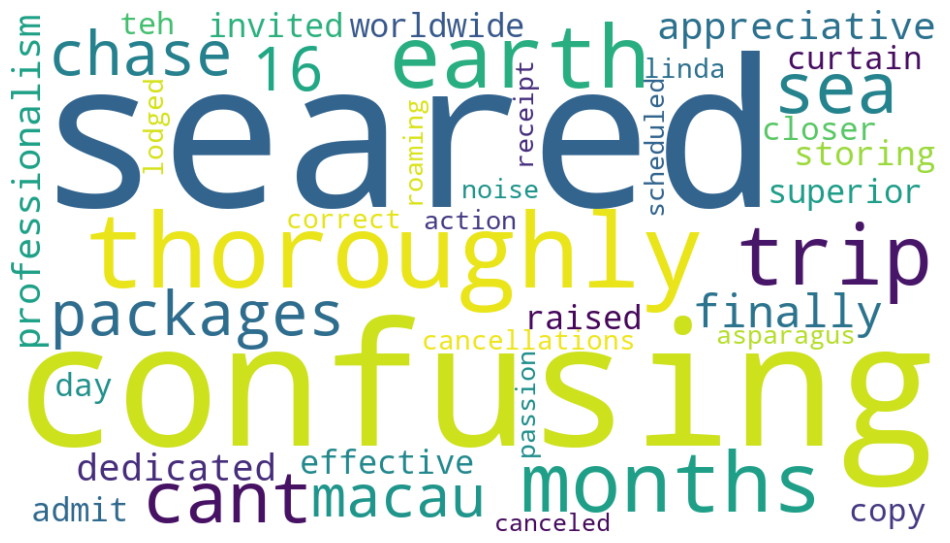

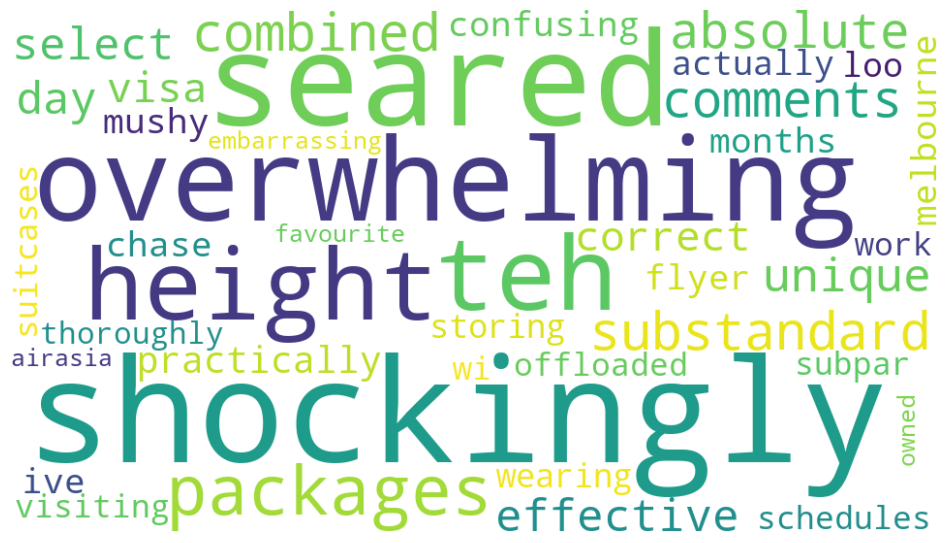

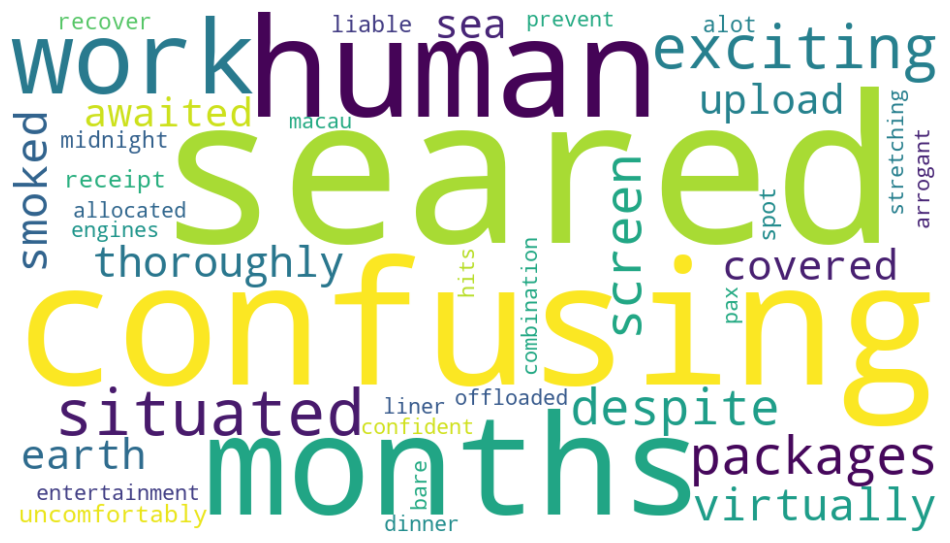

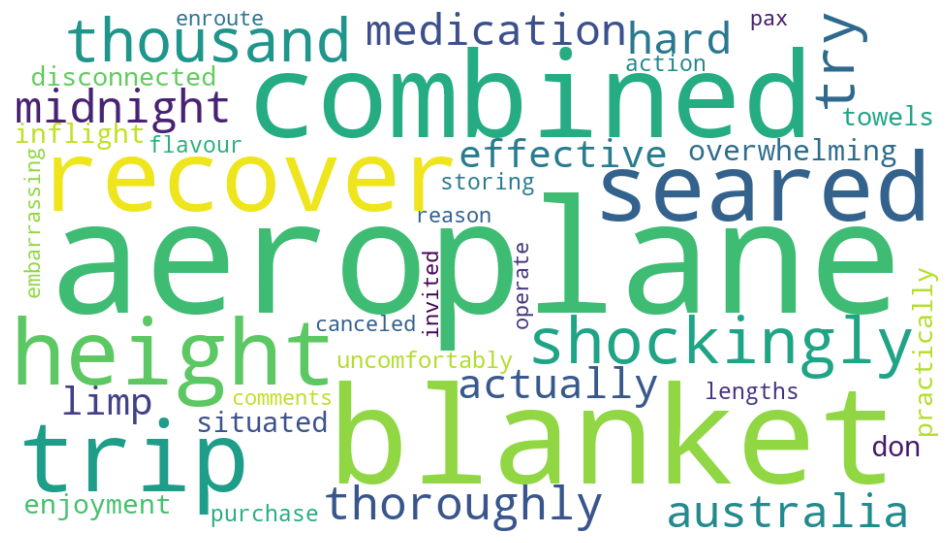

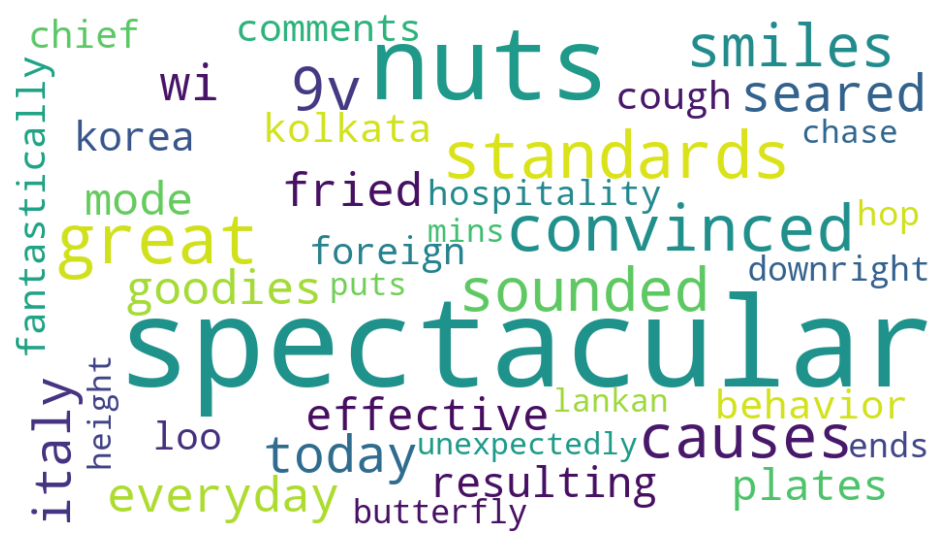

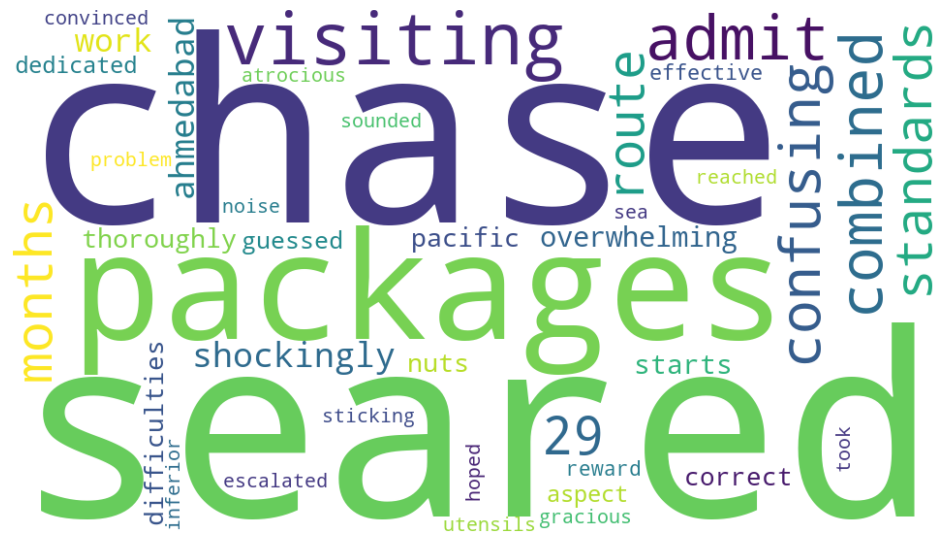

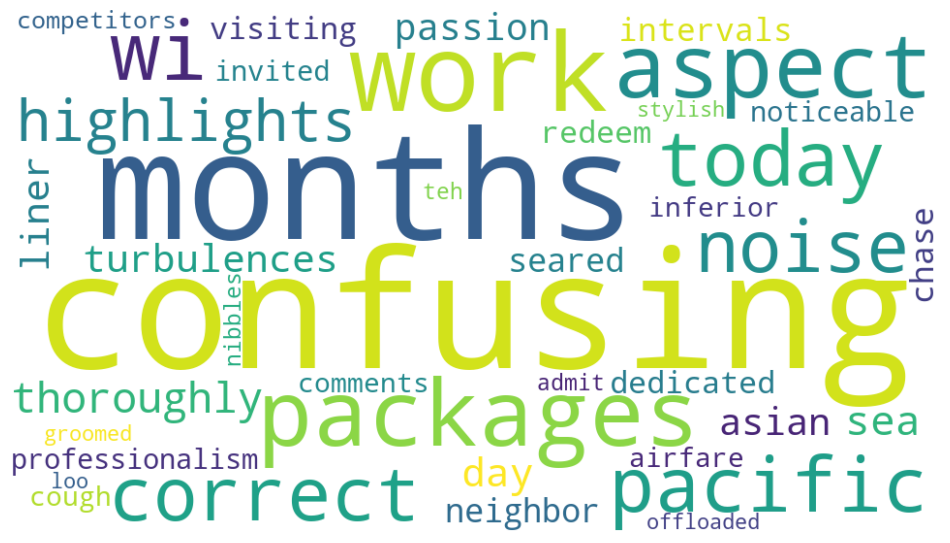

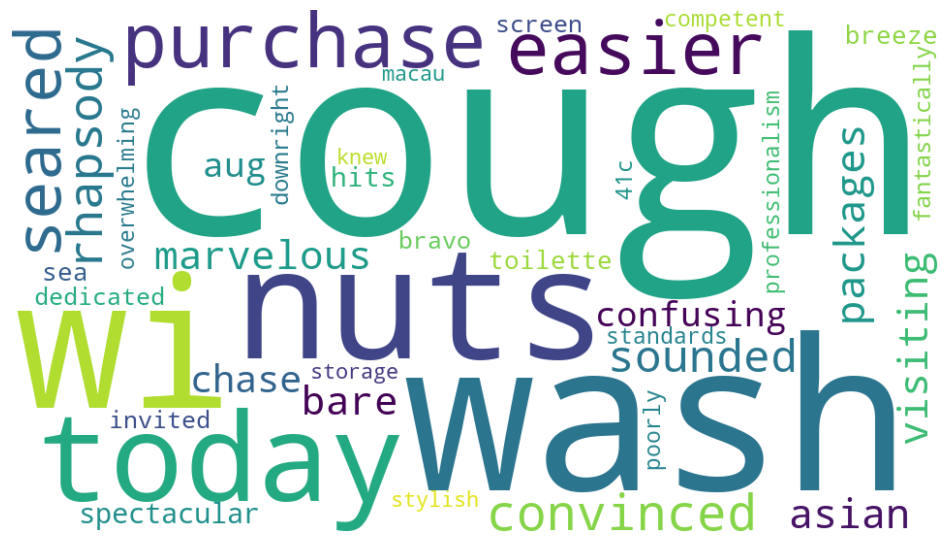

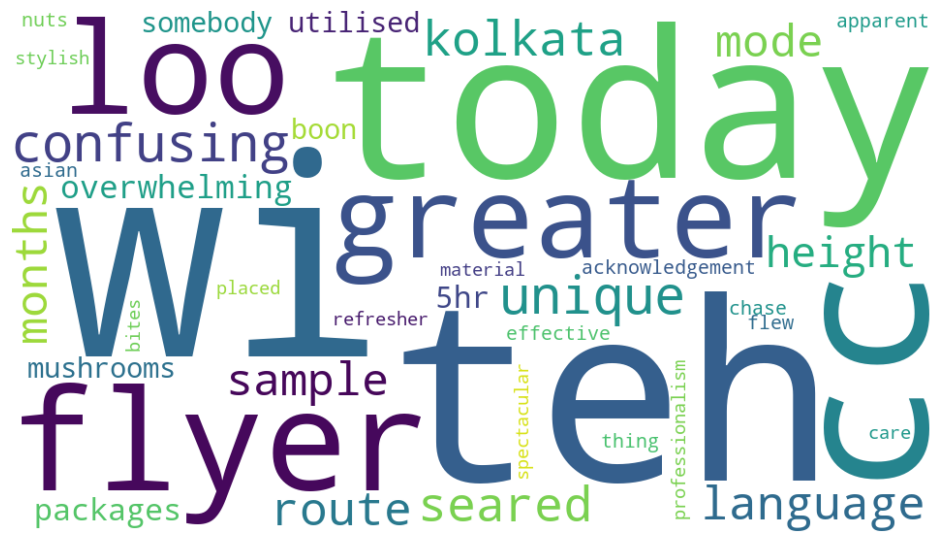

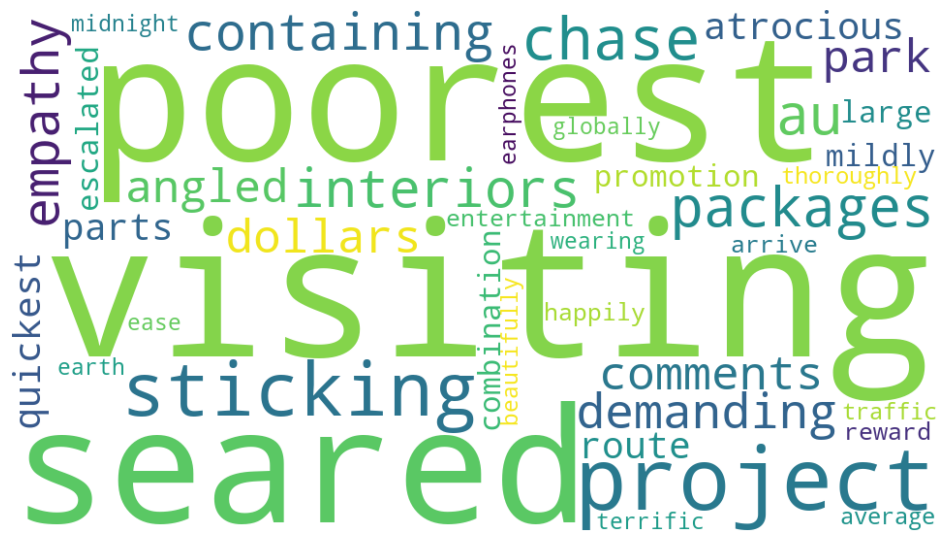

In [23]:
feature_names = list(count_para_vectorizer.vocabulary_.keys())
wordcloud_topics(lda_para_model, feature_names)

#### create topic names based on the top words associated with each topic in your NMF (Non-Negative Matrix Factorization) model.

In [24]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)


#### using the tqdm library for progress tracking and numpy to handle numerical operations

In [25]:
from tqdm.auto import tqdm
import numpy as np
rating_data = []
for rating in tqdm(np.unique(np.unique(paragraph_df["rating"]))):
    W_rating = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["rating"] == rating)])
    rating_data.append([rating] + list(W_rating.sum(axis=0)/W_rating.sum()*100.0))

C:\Users\pinis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\pinis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\pinis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
C:\Users\pinis\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. P

  0%|          | 0/5 [00:00<?, ?it/s]

####  using matplotlib to create an area plot showing the distribution of topics across different ratings. 

<Axes: xlabel='rating'>

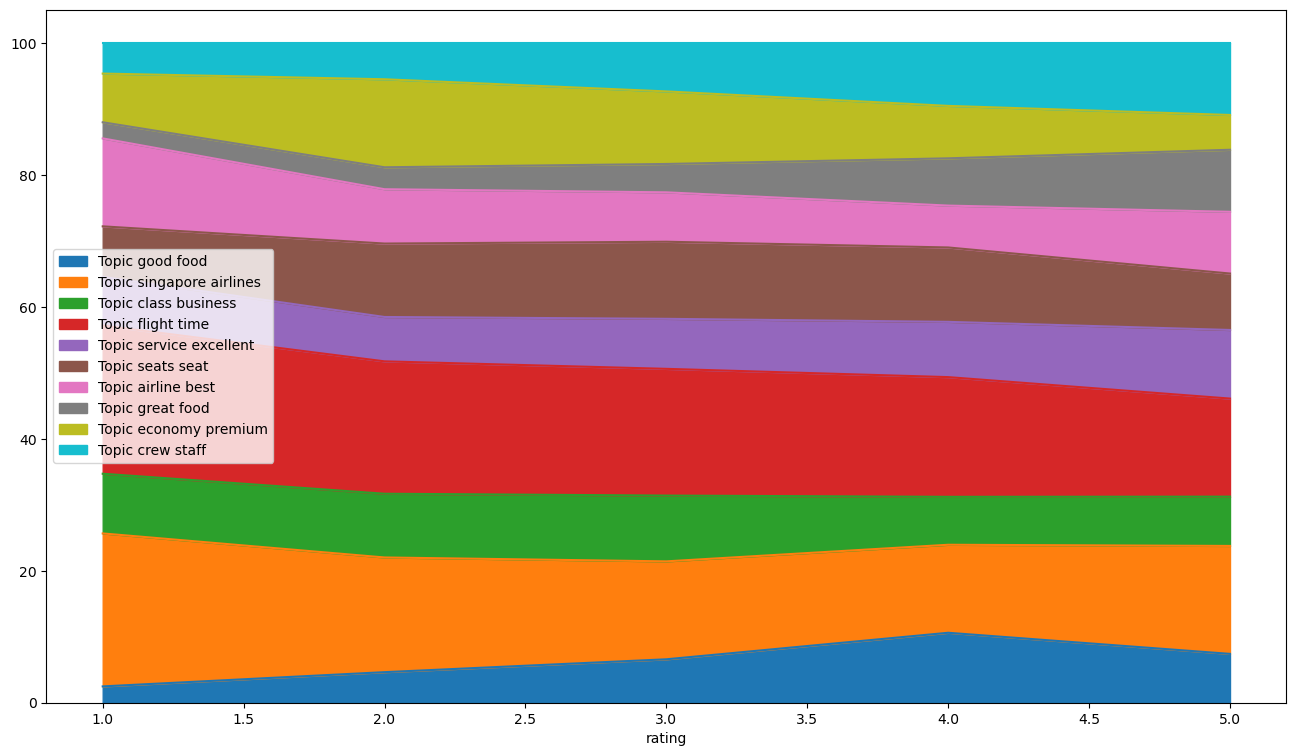

In [26]:
import matplotlib.pyplot as plt
df_rating = pd.DataFrame(rating_data, columns=["rating"] + topic_names).set_index("rating")
df_rating.plot.area(figsize=(16,9))